In [1]:
%pylab inline
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import pywrenext.analyze.util
import pywrenext.analyze.timeline

sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [64]:
rl = pickle.load(open("../examples/runlog.pickle", 'rb'))


In [63]:
#old_rl = rl

In [65]:
iter_futures_dfs = []

for ai, a in enumerate(rl['iter_futures_hist'][:]):
    print(ai)
    df = pywrenext.analyze.util.job_df_from_futures(a)
    df['run_id'] = ai
    iter_futures_dfs.append(df)
iter_futures_dfs = pd.concat(iter_futures_dfs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [66]:
n_df = pywrenext.analyze.util.normalize_times(iter_futures_dfs)
n_df['run_id'] = iter_futures_dfs.run_id

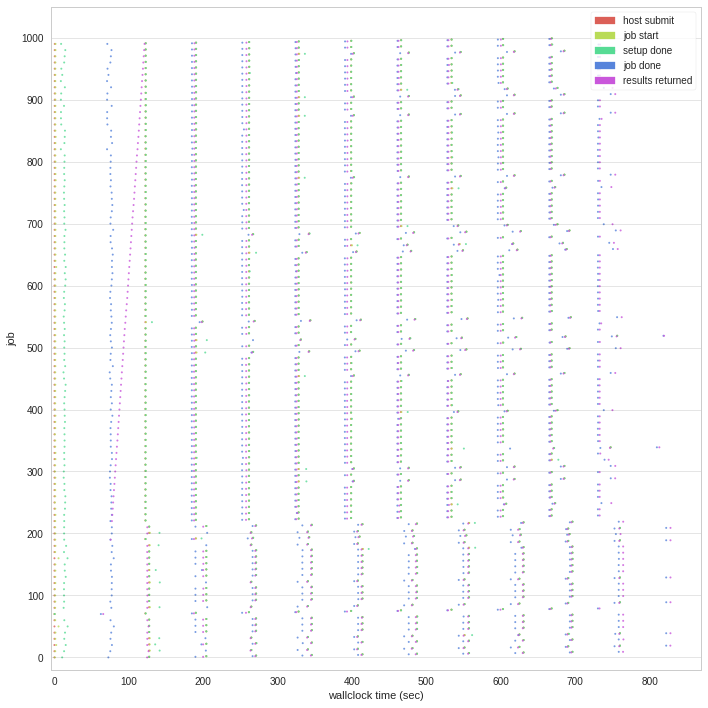

In [67]:
pywrenext.analyze.timeline.plot_jobs(n_df)

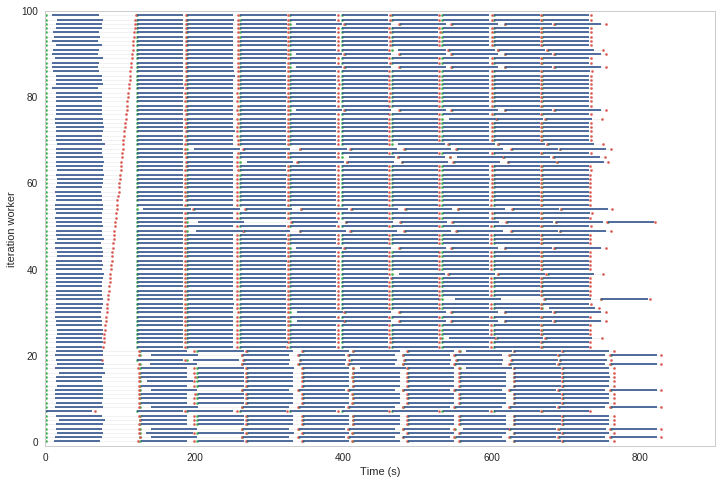

In [72]:
palette = sns.color_palette("hls", 5)

    
from matplotlib.collections import LineCollection

fig = pylab.figure(figsize=(12, 8))
ax = fig.add_subplot( 1, 1, 1)

start_color = sns.xkcd_rgb["medium green"]
end_color = sns.xkcd_rgb['pale red']
work_color = sns.xkcd_rgb['denim blue']

lc = []
for gi, g in n_df.groupby('run_id'):
    segs = [[(r['setup done'], gi), (r['job done'], gi)] for r_i, r in g.iterrows()]
    line_segs = LineCollection(segs,  colors=work_color)
    ax.add_collection(line_segs)

    segs = [[(r['host submit'], gi), (r['results returned'], gi)] for r_i, r in g.iterrows()]
    line_segs = LineCollection(segs,  colors='k', alpha=0.1, linewidth=0.5, zorder=-1)
    ax.add_collection(line_segs)
    ax.scatter(g['host submit'], np.ones(len(g))*gi, c=start_color, s=5)
    ax.scatter(g['results returned'], np.ones(len(g))*gi, c=end_color, s=5)
ax.set_xlim(-1, 900)
ax.set_ylim(-1, 100)
ax.grid(False)
ax.set_xlabel('Time (s)')
ax.set_ylabel("iteration worker")
fig.savefig('iter_timeline.pdf', transparent=True)

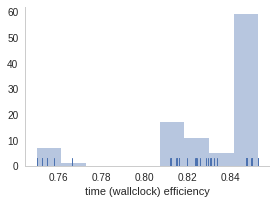

In [99]:
fig = pylab.figure(figsize=(4, 3))
res = []
for gi, g in n_df.groupby('run_id'):
   first_submit_time = g['host submit'].min()
   last_done_time = g['results returned'].max()
   compute_time = g['job done'] - g['setup done']
   total_compute_time = np.sum(compute_time)
   res.append(total_compute_time / (last_done_time - first_submit_time))
sns.distplot(res, kde=False, rug=True)
sns.despine()
pylab.grid(False)
pylab.xlabel("time (wallclock) efficiency")
fig.tight_layout()
pylab.savefig("time_efficiency.pdf", transparent=False)

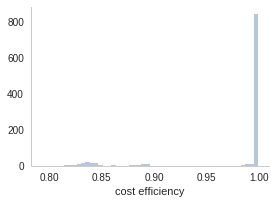

In [97]:
fig = pylab.figure(figsize=(4, 3))
compute_time = n_df['job done'] - n_df['setup done']
job_runtime =  n_df['job done'] - n_df['job start']

res = compute_time / job_runtime
sns.distplot(res, kde=False, rug=False)
sns.despine()
pylab.grid(False)
pylab.xlabel("cost efficiency")
fig.tight_layout()
pylab.savefig("cost_efficiency.pdf", transparent=False)

In [98]:
compute_time.sum() / job_runtime.sum()

0.975489026328213